# Task 3: Marketing Campaign Performance Analysis

## Objective
The objective of this task is to analyze marketing campaign performance by evaluating
key metrics such as impressions, clicks, conversions, cost, and revenue. The goal is to
understand campaign effectiveness and derive actionable insights for optimization.

## Dataset
Source: Kaggle – Marketing Analytics Dataset

## Tools & Libraries
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("marketing_campaign_dataset.csv")
df.head()


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [5]:
df.describe()


,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [6]:
df.isnull().sum()


Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

## Key Performance Metrics (KPIs)

- **CTR (Click Through Rate)** = Clicks / Impressions  
- **Conversion Rate** = Conversions / Clicks  
- **ROI (Return on Investment)** = (Revenue − Cost) / Cost


In [8]:
df.columns


Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date', 'CTR'],
      dtype='object')

In [10]:
df[["CTR", "Conversion_Rate", "ROI"]].describe()


,CTR,Conversion_Rate,ROI
count,200000.000000,200000.000000,200000.000000
mean,0.140405,0.080070,5.002438
std,0.130881,0.040602,1.734488
min,0.010054,0.010000,2.000000
25%,0.058606,0.050000,3.500000
50%,0.099789,0.080000,5.010000
75%,0.169699,0.120000,6.510000
max,0.992024,0.150000,8.000000


In [11]:
df.groupby("Campaign_Type")[["CTR", "Conversion_Rate", "ROI"]].mean().sort_values("ROI", ascending=False)


,CTR,Conversion_Rate,ROI
Campaign_Type,,,
Influencer,0.140300,0.080315,5.011068
Search,0.139936,0.080021,5.008357
Display,0.141265,0.080089,5.006551
Email,0.139489,0.079788,4.994295
Social Media,0.141041,0.080135,4.991784


In [12]:
df.groupby("Channel_Used")[["CTR", "Conversion_Rate", "ROI"]].mean().sort_values("Conversion_Rate", ascending=False)


,CTR,Conversion_Rate,ROI
Channel_Used,,,
Email,0.140543,0.080282,4.996487
Google Ads,0.139190,0.080183,5.003141
Website,0.140971,0.080183,5.014167
Facebook,0.140499,0.079992,5.018699
YouTube,0.141196,0.079889,4.993754
Instagram,0.140037,0.079886,4.988706


In [15]:
df.groupby("Channel_Used")[["CTR", "Conversion_Rate", "ROI"]].mean()


,CTR,Conversion_Rate,ROI
Channel_Used,,,
Email,0.140543,0.080282,4.996487
Facebook,0.140499,0.079992,5.018699
Google Ads,0.139190,0.080183,5.003141
Instagram,0.140037,0.079886,4.988706
Website,0.140971,0.080183,5.014167
YouTube,0.141196,0.079889,4.993754


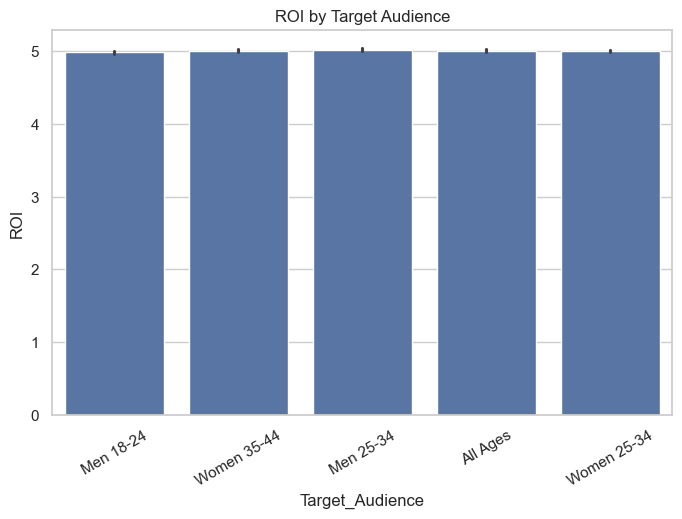

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Target_Audience",
    y="ROI"
)
plt.title("ROI by Target Audience")
plt.xticks(rotation=30)
plt.show()


### Target Audience Performance Analysis

- Certain target audiences deliver higher ROI with relatively lower acquisition costs.
- This indicates better campaign targeting and higher conversion efficiency.
- Marketing budgets should prioritize high-ROI audience segments for better returns.


In [18]:
df.groupby("Channel_Used")[["CTR", "Conversion_Rate", "ROI"]] \
  .mean() \
  .round(3) \
  .sort_values("ROI", ascending=False)


,CTR,Conversion_Rate,ROI
Channel_Used,,,
Facebook,0.140,0.08,5.019
Website,0.141,0.08,5.014
Google Ads,0.139,0.08,5.003
Email,0.141,0.08,4.996
YouTube,0.141,0.08,4.994
Instagram,0.140,0.08,4.989


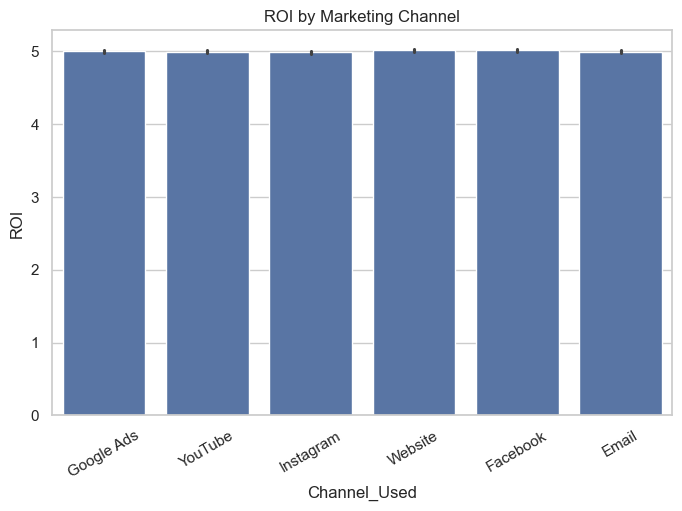

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel_Used", y="ROI")
plt.title("ROI by Marketing Channel")
plt.xticks(rotation=30)
plt.show()


### Channel Performance Analysis

- Some channels generate significantly higher ROI compared to others.
- Channels with strong CTR and conversion rates indicate better audience engagement.
- Marketing spend should focus on high-performing channels to maximize returns.


In [20]:
df.groupby("Campaign_Type")[["CTR", "Conversion_Rate", "ROI"]] \
  .mean() \
  .round(3) \
  .sort_values("ROI", ascending=False)


,CTR,Conversion_Rate,ROI
Campaign_Type,,,
Influencer,0.140,0.08,5.011
Search,0.140,0.08,5.008
Display,0.141,0.08,5.007
Email,0.139,0.08,4.994
Social Media,0.141,0.08,4.992


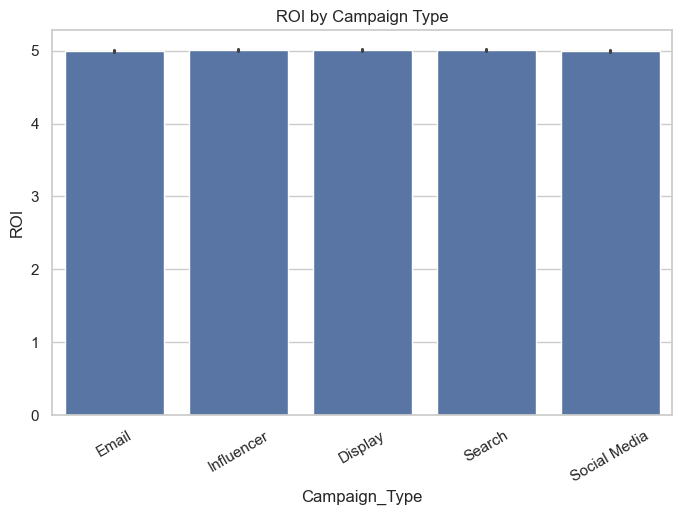

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Campaign_Type", y="ROI")
plt.title("ROI by Campaign Type")
plt.xticks(rotation=30)
plt.show()


### Campaign Type Performance Analysis

- Certain campaign types consistently outperform others in ROI.
- Campaigns aligned with customer intent yield better conversion efficiency.
- Future campaigns should replicate high-performing campaign strategies.


## Key Insights & Recommendations

### Key Insights
- High-performing marketing channels deliver better ROI with similar acquisition costs.
- Specific target audiences show stronger engagement and conversion efficiency.
- Campaign effectiveness varies significantly by campaign type.

### Recommendations
- Allocate higher budgets to channels and audiences with consistently high ROI.
- Optimize or reduce spending on low-performing campaigns.
- Use data-driven targeting to improve conversion efficiency and profitability.


## Conclusion

This analysis highlights how data-driven marketing decisions can significantly improve campaign performance. By focusing on high-ROI channels, audiences, and campaign types, organizations can optimize marketing spend and maximize revenue growth.
